In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import cna
np.random.seed(0) # for reproducibility
# tbcovs = ['nUMI', 'percent_mito', 'age', 'Sex_M', 'season_Winter', 'EURad4KR', 'age2']
# from importlib import reload
# reload(cna.tl._nam)
# reload(cna.tl._association)

/PHShome/yr073/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


## harmonized data

In [2]:
mrna = cna.read('/data/srlab1/laurie-yakir/tbru.real/2.munged/harmmrna.h5ad')
mrna.obs_to_sample(['batch', 'nUMI', 'percent_mito'])
mrna.samplem['age2'] = mrna.samplem.age**2
cna.tl.nam(mrna, batches=mrna.samplem.batch, covs=mrna.samplem[['nUMI','percent_mito']], force_recompute=True)

qcd NAM not found; computing and saving
	taking step 1
	median kurtosis: 65.2238540649414
	taking step 2
	median kurtosis: 49.052650451660156
	taking step 3
	median kurtosis: 28.971097946166992
	taking step 4
	median kurtosis: 18.28443145751953
	taking step 5
	median kurtosis: 11.800000190734863
	taking step 6
	median kurtosis: 8.272377014160156
	taking step 7
	median kurtosis: 6.357010364532471
stopping after 7 steps
throwing out neighborhoods with batch kurtosis >= 7.22025203704834
keeping 447296 neighborhoods
covariate-adjusted NAM not found; computing and saving
	with ridge 100000.0 median batch kurtosis =  3.6042004997911032
computing SVD


In [3]:
prot = cna.read('/data/srlab1/laurie-yakir/tbru.real/2.munged/harmprot.h5ad')
prot.obs_to_sample(['batch', 'nUMI', 'percent_mito'])
prot.samplem['age2'] = prot.samplem.age**2
cna.tl.nam(prot, batches=prot.samplem.batch, covs=prot.samplem[['nUMI','percent_mito']])

qcd NAM not found; computing and saving
	taking step 1
	median kurtosis: 62.95005798339844
	taking step 2
	median kurtosis: 46.884666442871094
	taking step 3
	median kurtosis: 28.252164840698242
	taking step 4
	median kurtosis: 18.792322158813477
	taking step 5
	median kurtosis: 13.07491683959961
	taking step 6
	median kurtosis: 9.70358657836914
	taking step 7
	median kurtosis: 7.66352653503418
stopping after 7 steps
throwing out neighborhoods with batch kurtosis >= 7.177057266235352
keeping 417220 neighborhoods
covariate-adjusted NAM not found; computing and saving
	with ridge 100000.0 median batch kurtosis =  3.2569306345936986
computing SVD


In [4]:
cca = cna.read('/data/srlab1/laurie-yakir/tbru.real/2.munged/harmcca20.h5ad')
cca.obs_to_sample(['batch', 'nUMI', 'percent_mito'])
cca.samplem['age2'] = cca.samplem.age**2
cna.tl.nam(cca, batches=cca.samplem.batch, covs=cca.samplem[['nUMI','percent_mito']])

qcd NAM not found; computing and saving
	taking step 1
	median kurtosis: 62.605323791503906
	taking step 2
	median kurtosis: 47.74407196044922
	taking step 3
	median kurtosis: 28.404003143310547
	taking step 4
	median kurtosis: 18.32767677307129
	taking step 5
	median kurtosis: 12.190411567687988
	taking step 6
	median kurtosis: 8.55459976196289
	taking step 7
	median kurtosis: 6.364263534545898
stopping after 7 steps
throwing out neighborhoods with batch kurtosis >= 6.992162704467773
keeping 432238 neighborhoods
covariate-adjusted NAM not found; computing and saving
	with ridge 100000.0 median batch kurtosis =  3.284342392882423
computing SVD


In [17]:
sc.tl.pca(mrna)
sc.tl.pca(prot)
sc.tl.pca(cca)

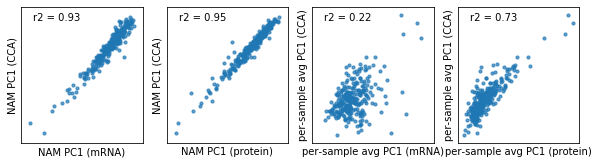

In [42]:
f, [ax1, ax2, ax3, ax4] = plt.subplots(1,4, figsize=(10,2.5))
for ax, d, l in [(ax1, mrna, 'mRNA'), (ax2, prot, 'protein')]:
    x, y = d.uns['NAM_sampleXpc'].PC1, cca.uns['NAM_sampleXpc'].PC1
    ax.scatter(x, y, alpha=0.7, s=10)
    ax.text(0.1, 0.9, 'r2 = {:.2f}'.format(np.corrcoef(x,y)[0,1]**2), transform=ax.transAxes)
    ax.set_xlabel('NAM PC1 ({})'.format(l))
    ax.set_ylabel('NAM PC1 (CCA)')
    ax.set_xticks([]); ax.set_yticks([])

for ax, d, l in [(ax3, mrna, 'mRNA'), (ax4, prot, 'protein')]:
    d.obs['PC1'] = d.obsm['X_pca'][:,0]
    cca.obs['PC1'] = cca.obsm['X_pca'][:,0]
    x, y = d.obs.groupby(by='id').PC1.aggregate(np.mean), cca.obs.groupby(by='id').PC1.aggregate(np.mean)
    ax.scatter(x, y, alpha=0.7, s=10)
    ax.text(0.1, 0.9, 'r2 = {:.2f}'.format(np.corrcoef(x,y)[0,1]**2), transform=ax.transAxes)
    ax.set_xlabel('per-sample avg PC1 ({})'.format(l))
    ax.set_ylabel('per-sample avg PC1 (CCA)')
    ax.set_xticks([]); ax.set_yticks([])
plt.show()

In [33]:
# variance explained
for d in [mrna, prot, cca]:
    print(d.uns['NAM_varexp'][0])

0.23074752735913887
0.15241683973461584
0.24262001532194377


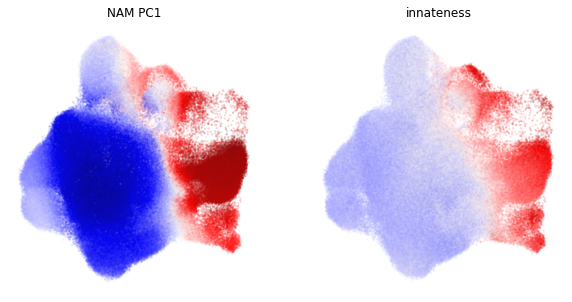

In [48]:
f, [ax1, ax2] = plt.subplots(1,2, figsize=(10,5))

for ax, c, l in [(ax1, -cca.uns['NAM_nbhdXpc'].PC1, 'NAM PC1'), (ax2, cca.X[cca.uns['keptcells'],0], 'innateness')]:
    ax.axis('off')
    ax.scatter(*cca.obsm['X_umap'][cca.uns['keptcells']].T, s=2, alpha=0.1, c=c, cmap='seismic', vmin=-max(np.abs(c)), vmax=max(np.abs(c)))
    ax.set_title(l)
plt.show()

In [52]:
# correlation of NAM PC1 to innateness
np.corrcoef(-cca.uns['NAM_nbhdXpc'].PC1, cca.X[cca.uns['keptcells'],0])[0,1]

0.8368926318350048

mRNA 7 0.025830258302583026
protein 10 0.03690036900369004
CCA 5 0.01845018450184502


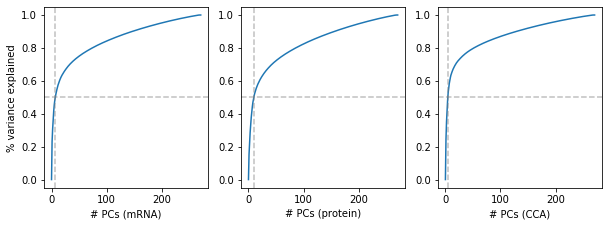

In [79]:
f, axs = plt.subplots(1,3, figsize=(10,3.33))

for ax, (d, l) in zip(axs, [(mrna, 'mRNA'), (prot, 'protein'), (cca, 'CCA')]):
    y = np.cumsum(np.concatenate([[0], d.uns['NAM_varexp']]))
    k = np.where(y >= 0.5)[0][0]
    print(l, k, k/271.)
    ax.plot(y)
    ax.axvline(x=k, color='gray', linestyle='--', alpha=0.5)
    ax.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
    ax.set_xlabel('# PCs ({})'.format(l))
axs[0].set_ylabel('% variance explained')
plt.show()

## non-harmonized data (mRNA only)

In [80]:
mrna_noharm = cna.read('/data/srlab1/laurie-yakir/tbru.real/2.munged/mrna.h5ad')
mrna_noharm.obs_to_sample(['batch', 'nUMI', 'percent_mito'])
mrna_noharm.samplem['age2'] = mrna_noharm.samplem.age**2
cna.tl.nam(mrna_noharm, batches=mrna_noharm.samplem.batch, covs=mrna_noharm.samplem[['nUMI','percent_mito']], force_recompute=True)

qcd NAM not found; computing and saving
	taking step 1
	median kurtosis: 96.45571363398902
	taking step 2
	median kurtosis: 66.11929593184762
	taking step 3
	median kurtosis: 39.18345633687962
	taking step 4
	median kurtosis: 25.279649521369095
	taking step 5
	median kurtosis: 17.538748734387784
	taking step 6
	median kurtosis: 13.218013844769336
	taking step 7
	median kurtosis: 10.665356323599964
stopping after 7 steps
throwing out neighborhoods with batch kurtosis >= 8.667603813822101
keeping 393998 neighborhoods
covariate-adjusted NAM not found; computing and saving
	with ridge 100000.0 median batch kurtosis =  3.61557420585108
computing SVD


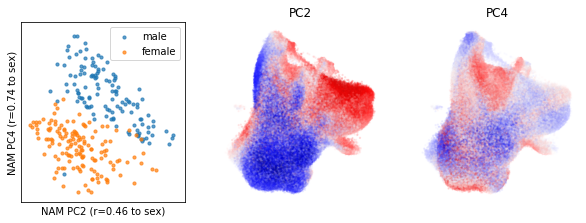

In [88]:
f, axs = plt.subplots(1,3, figsize=(10,3.3))

U, V = mrna_noharm.uns['NAM_sampleXpc'], mrna_noharm.uns['NAM_nbhdXpc']

i, j = 'PC2', 'PC4'
ax1 = axs[0]
male = mrna_noharm.samplem.Sex_M.astype(bool)
ax1.scatter(U[i][male], U[j][male], alpha=0.7, s=10, label='male')
ax1.scatter(U[i][~male], U[j][~male], alpha=0.7, s=10, label='female')
ax1.legend()
ax1.set_xticks([]); ax1.set_yticks([])
ax1.set_xlabel('NAM {} (r={:.2f} to sex)'.format(i, np.corrcoef(U[i], mrna_noharm.samplem.Sex_M)[0,1]))
ax1.set_ylabel('NAM {} (r={:.2f} to sex)'.format(j, np.corrcoef(U[j], mrna_noharm.samplem.Sex_M)[0,1]))

for ax, (c, l) in zip(axs[1:], [(V[i], i), (V[j], j)]):
    ax.axis('off')
    ax.scatter(*mrna_noharm.obsm['X_umap'][mrna_noharm.uns['keptcells']].T, s=2, alpha=0.1,
               c=c, cmap='seismic', vmin=-max(np.abs(c)), vmax=max(np.abs(c)))
    ax.set_title(l)

plt.show()

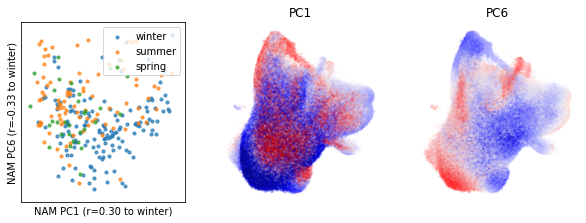

In [100]:
f, axs = plt.subplots(1,3, figsize=(10,3.3))

U, V = mrna_noharm.uns['NAM_sampleXpc'], mrna_noharm.uns['NAM_nbhdXpc']

i, j = 'PC1', 'PC6'
ax1 = axs[0]
winter = mrna_noharm.samplem.season_Winter.astype(bool)
summer = mrna_noharm.samplem.season_Summer.astype(bool)
spring = mrna_noharm.samplem.season_Spring.astype(bool)
ax1.scatter(U[i][winter], U[j][winter], alpha=0.7, s=10, label='winter')
ax1.scatter(U[i][summer], U[j][summer], alpha=0.7, s=10, label='summer')
ax1.scatter(U[i][spring], U[j][spring], alpha=0.7, s=10, label='spring')
ax1.legend(loc='upper right')
ax1.set_xticks([]); ax1.set_yticks([])
ax1.set_xlabel('NAM {} (r={:.2f} to winter)'.format(i, np.corrcoef(U[i], mrna_noharm.samplem.season_Winter)[0,1]))
ax1.set_ylabel('NAM {} (r={:.2f} to winter)'.format(j, np.corrcoef(U[j], mrna_noharm.samplem.season_Winter)[0,1]))

for ax, (c, l) in zip(axs[1:], [(V[i], i), (V[j], j)]):
    ax.axis('off')
    ax.scatter(*mrna_noharm.obsm['X_umap'][mrna_noharm.uns['keptcells']].T, s=2, alpha=0.1,
               c=c, cmap='seismic', vmin=-max(np.abs(c)), vmax=max(np.abs(c)))
    ax.set_title(l)

plt.show()

Text(0.5, 1, 'PC6')

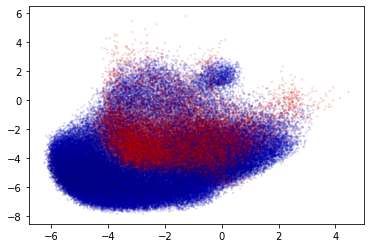

In [102]:
c = V.PC1
ix = np.abs(c) > 0.002
plt.scatter(*mrna_noharm.obsm['X_umap'][mrna_noharm.uns['keptcells']][ix].T, s=2, alpha=0.1,
           c=c[ix], cmap='seismic', vmin=-max(np.abs(c)), vmax=max(np.abs(c)))

In [151]:
c = V.PC6
d = mrna_noharm
X = d.X[d.uns['keptcells']]
X.shape

(393998, 2865)

In [152]:
c_pos = c.copy(); c_pos[c_pos < np.percentile(c_pos, 20)] = 0
c_neg = -c.copy(); c_neg[c_neg < np.percentile(c_neg, 20)] = 0
corrs_pos = (X - X.mean(axis=0)).T.dot(c_pos - c_pos.mean()) / c_pos.std() / X.std(axis=0) / len(c_pos)
corrs_neg = (X - X.mean(axis=0)).T.dot(c_neg - c_neg.mean()) / c_neg.std() / X.std(axis=0) / len(c_neg)

In [153]:
df_pos = pd.DataFrame(index=d.var.index, data={'corr':corrs_pos})
df_neg = pd.DataFrame(index=d.var.index, data={'corr':corrs_neg})

In [154]:
df_pos.sort_values(by='corr', ascending=False)[:10]

,corr
LIMS1,0.221326
PASK,0.194140
LTB,0.186233
RPL37,0.182833
RPS8,0.177137
CCR7,0.173860
RPS4X,0.172993
RPL22,0.171030
RPS6,0.169244
TPT1,0.167633


In [155]:
df_neg.sort_values(by='corr', ascending=False)[:10]

,corr
GZMK,0.295034
RPS4Y1,0.237507
ANXA1,0.190639
LYAR,0.184463
DUSP2,0.182179
ZFP36L2,0.182085
CCL5,0.181451
DDX3Y,0.169478
IL7R,0.158349
TNFAIP3,0.154023


## scratch

In [ ]:
phenos = list(cca.samplem.columns[3:42])+['nUMI', 'percent_mito']

for d in [mrna, prot, cca]:
    U = d.uns['NAM_sampleXpc'].values
    V = d.uns['NAM_nbhdXpc'].values
    
    plt.figure(figsize=(10,6))
    for pheno in phenos:
        corrs = np.abs(np.corrcoef(U[:,:20].T, d.samplem[[pheno]].values.T)[:-1,-1])
        if sum(corrs > 0.2) > 0:
            plt.plot(corrs, label=pheno, alpha=1, linewidth=5)
    plt.ylim(0,1)
    plt.legend()
    plt.show()
    varexp = np.cumsum(d.uns['NAM_svs'])
    plt.plot(varexp)
    plt.axvline(x=15)
    print(np.where(varexp > 0.75)[0][0])
    plt.ylim(0,1)
    plt.show()

In [ ]:
x = np.random.randn(10000) + 1
y = 5*x + 7 + 10*np.random.randn(10000)
x_ = x - x.mean()
y_ = y - y.mean()
y_hat = x_.dot(y_)/x_.dot(x_) * x_
r2 = ((y_-y_.mean()).dot(y_hat - y_hat.mean()) / y_.std() / y_hat.std() / len(x))**2
ssefull = (y_hat - y_).dot(y_hat - y_)
ssered = y_.dot(y_)
r2, 1-ssefull/ssered

In [ ]:
from importlib import reload
reload(cna.tl._association)
np.random.seed(0)
for d in [cca]:
    res = cna.tl._association.association(d, d.samplem.TB_STATUS_CASE,
                                          batches=d.samplem.batch, covs=d.samplem[tbcovs], local_test=True, suffix='TB')
    cna.pl.umap_ncorr(d, res, fdr_thresh='10p',
            scatter0={'alpha':0.5, 's':20},
            scatter1={'alpha':0.05, 's':20})
    print(res.p, res.k, res.r2, res.nullr2_mean, res.nullr2_std)

In [ ]:
cna.pl.umap_ncorr(d, res, fdr_thresh='5p',
            scatter0={'alpha':0.5, 's':20},
            scatter1={'alpha':0.05, 's':20})

In [ ]:
((res.ncorrs > 0)&(np.abs(res.ncorrs) > res.fdr_5p_t)).sum()

In [ ]:
from importlib import reload
reload(cna.tl._association)
np.random.seed(0)
for d in [mrna]:
    y = np.random.randn(d.N)#d.uns['NAM_sampleXpcTB'].PC3
    y = y / np.std(y)
    snr = 1
    res = cna.tl._association.association(d, y + (1/snr-1)*np.random.randn(d.N),
                                          batches=d.samplem.batch, covs=None, local_test=False, suffix='TB',
                                         ks=None)
#     cna.pl.umap_ncorr(d, res, fdr_thresh='10p',
#             scatter0={'alpha':0.5, 's':20},
#             scatter1={'alpha':0.05, 's':20})
    print(res.p, res.k, res.r2, res.nullr2_mean, res.nullr2_std)

In [ ]:
st.kurtosis([d.samplem[d.samplem.batch == b].season_Winter.mean() for b in d.samplem.batch.unique()])+3

In [ ]:
def anova(NAM, B):
    batchNAM = np.array([NAM[B==b].mean(axis=0) for b in np.unique(B)])
    print(batchNAM.shape)
    varamong = np.var(batchNAM, axis=0)
    vartotal = np.var(NAM, axis=0)
    return varamong/vartotal
NAM = mrna.uns['NAM.TTB'].T
anovas = anova(NAM.values, mrna.samplem.batch.values)
plt.plot(sorted(anovas))
plt.show()

In [ ]:
anovas = anova(mrna.uns['NAM_sampleXpcTB'].values, mrna.samplem.batch.values)
plt.plot(sorted(anovas))

In [ ]:
np.max(anovas)*len(anovas)**2

In [ ]:
((res.ncorrs>0)&(np.abs(res.ncorrs) > res.fdr_10p_t)).sum()

In [ ]:
res.r2

In [ ]:
cna.pl.umap_ncorr(d, res, fdr_thresh='10p',
            scatter0={'alpha':0.5, 's':20},
            scatter1={'alpha':0.05, 's':20})
plt.show()

In [ ]:
(d.samplem.season_Winter + d.samplem.season_Summer+d.samplem.season_Spring).sum()

In [ ]:
d = mrna
U = d.uns['NAM_sampleXpc'].values
V = d.uns['NAM_nbhdXpc'].values
plt.scatter(U[:,0], U[:,1], c=d.samplem.season_Summer+d.samplem.season_Spring, alpha=0.5)
plt.colorbar()
plt.show()
print(np.corrcoef(U[:,0], d.samplem.season_Winter)[0,1])
print(np.corrcoef(U[:,1], d.samplem.Sex_M)[0,1])

In [ ]:
np.corrcoef(V[:,1], V[:,5])

In [ ]:
# import seaborn as sns
# sns.violinplot(x=mrna.samplem.season_Winter, y=mrna.uns['NAM_sampleXpc'].PC5)
# plt.show()
i = 0
for ix in [mrna.samplem.season_Winter.astype(bool), mrna.samplem.season_Summer.astype(bool), ~(mrna.samplem.season_Winter + mrna.samplem.season_Summer).astype(bool)]:
    plt.scatter(mrna.uns['NAM_sampleXpc'].PC0[ix.values], mrna.uns['NAM_sampleXpc'].PC5[ix.values], label=i)
    i = i+1
plt.legend()
plt.show()
# np.corrcoef(mrna.uns['NAM_sampleXpc'].PC0, cca.uns['NAM_sampleXpc'].PC1)[0,1]

In [ ]:
sc.tl.pca(mrna)
sc.tl.pca(prot)

In [ ]:
df = mrna.obs.copy()
df['mrna_pc'] = mrna.obsm['X_pca'][:,0]
df['prot_pc'] = prot.obsm['X_pca'][:,0]
plt.scatter(*df[['id','mrna_pc','prot_pc']].groupby(by='id').aggregate(np.mean).values.T)
np.corrcoef(df.mrna_pc, df.prot_pc)[0,1]

In [ ]:
for pheno in ['age', 'Sex_M', 'season_Summer', 'BMI', 'TB_STATUS_CASE',
       'season_Winter', 'Height', 'Weight', 'NATad4KR',
       'edu_cat_belowHighschool', 'pre_TB', 'malnutrition_underweight',
       'sesgroup2_low', 'sesgroup']:
    for d,l in [(mrna,'mrna'), (prot,'prot'), (cca,'cca')]:
        U = d.uns['NAM_sampleXpc'].values
        V = d.uns['NAM_nbhdXpc'].values
        corrs = (np.corrcoef(U[:,:].T, d.samplem[[pheno]].values.T)[:-1,-1])**2
        plt.plot(np.cumsum(corrs), label=l)
    plt.plot([0,d.N],[0,1])
    plt.axvline(x=20)
    plt.legend()
    plt.title(pheno)
    plt.show()

In [ ]:
d.uns['NAM.T'].shape

In [ ]:
X = mrna.X[d.uns['keptcells']]
i = 2
pc = V[:,i].copy()
pc[pc < 0] = 0
corrs = (X - X.mean(axis=0)).T.dot(pc - pc.mean()) / pc.std() / X.std(axis=0) / len(X)
mrna.var['corr'] = corrs
print(mrna.var.sort_values(by='corr', ascending=False))
# print('\n'.join(mrna.var.sort_values(by='corr', ascending=False)[:20].index.values))
print('\n')
pc = V[:,i].copy()
pc[pc > 0] = 0
pc = -pc
corrs = (X - X.mean(axis=0)).T.dot(pc - pc.mean()) / pc.std() / X.std(axis=0) / len(X)
mrna.var['corr'] = corrs
# print('\n'.join(mrna.var.sort_values(by='corr', ascending=False)[:20].index.values))
print(mrna.var.sort_values(by='corr', ascending=False))

In [ ]:
for i in range(3):
    pc = d.X[:,i]
    plt.scatter(*d.obsm['X_umap'].T, c=pc, cmap='seismic', vmin=-max(np.abs(pc)), vmax=max(np.abs(pc)), alpha=0.1, s=5)
    plt.title(str(i))
    plt.show()

In [ ]:
pc = mrna.X[d.uns['keptcells'], np.where(mrna.var.index == 'NEFL')[0]]
plt.scatter(*d.obsm['X_umap'][d.uns['keptcells']].T, c=pc, cmap='seismic', vmin=-max(np.abs(pc)), vmax=max(np.abs(pc)), alpha=0.1, s=5)
plt.title(str(i))
plt.show()

In [ ]:
d = mrna
U = d.uns['NAM_sampleXpc'].values
V = d.uns['NAM_nbhdXpc'].values
for i in range(6):
    pc = V[:,i]
    plt.scatter(*d.obsm['X_umap'][d.uns['keptcells']].T, c=pc, cmap='seismic', vmin=-max(np.abs(pc)), vmax=max(np.abs(pc)), alpha=0.1, s=5)
    plt.title(str(i))
    plt.show()

In [ ]:
import seaborn as sns
sns.violinplot(x=d.samplem.Sex_M, y=U[:,0])
plt.show()

## Make some plots

In [ ]:
print('plotting neighborhood correlations')
plt.figure(figsize=(10,10))
plt.scatter(*d.obsm['X_umap'][res.kept, :2].T, c=res.ncorrs, s=5, alpha=0.5, cmap='seismic', vmin=-0.5, vmax=0.5)
xl, yl = plt.gca().get_xlim(), plt.gca().get_ylim()
plt.show()

if res.fdr_5p_t is not None:
    print('plotting neighborhood correlations at FDR < 5%')
    plt.figure(figsize=(10,10))
    mask = np.abs(res.ncorrs) > res.fdr_5p_t
    plt.scatter(*d.obsm['X_umap'][res.kept][mask, :2].T, c=res.ncorrs[mask], s=5, alpha=0.5, cmap='seismic', vmin=-0.5, vmax=0.5)
    plt.xlim(*xl)
    plt.ylim(*yl)
    plt.show()
    
if res.fdr_10p_t is not None:
    print('plotting neighborhood correlations at FDR < 10%')
    plt.figure(figsize=(10,10))
    mask = np.abs(res.ncorrs) > res.fdr_10p_t
    plt.scatter(*d.obsm['X_umap'][res.kept][mask, :2].T, c=res.ncorrs[mask], s=5, alpha=0.5, cmap='seismic', vmin=-0.5, vmax=0.5)
    plt.xlim(*xl)
    plt.ylim(*yl)
    plt.show()

In [ ]:
# representation of each of Aparna's clusters among min-fdr positively and negatively associated cells
# (though Laurie's notebook )

aparnaclust = d.obs.aparna2p0.values.copy()

mask = np.abs(res.ncorrs) > res.fdr_5p_t
ac = pd.Series(aparnaclust[res.kept])

print('positive (counts)')
counts = ac[mask & (res.ncorrs>0)].value_counts()
print(counts)
print('proportion of each cluster')
fracs = counts / ac.value_counts()
print(fracs[~np.isnan(fracs)].sort_values(ascending=False))

print('\nnegative (counts)')
counts = ac[mask & (res.ncorrs<0)].value_counts()
print(counts)
print('proportion of each cluster')
fracs = counts / ac.value_counts()
print(fracs[~np.isnan(fracs)].sort_values(ascending=False))

In [ ]:
d.obs['newpop'] = np.nan
d.obs.loc[res.kept, 'newpop'] = (mask & (res.ncorrs>0)).astype(float)

In [ ]:
d.samplem['newpop'] = d.obs.groupby(by='id').newpop.aggregate(np.nanmean)

In [ ]:
case = d.samplem.TB_STATUS_CASE
print(d.samplem.newpop[case].mean(), 2*d.samplem.newpop[case].std() / np.sqrt(len(d.samplem)))
print(d.samplem.newpop[~case].mean(), 2*d.samplem.newpop[~case].std() / np.sqrt(len(d.samplem)))